<h2>Import Libraries</h2>

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

<h2>Get Data</h2>

In [2]:
df = pd.read_csv('e1 positive.csv')

In [6]:
df.head()

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
0,35.038262,161.176004,68.074337,58.063405,20.021864,269.294069,188.205520,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.001093,0.0,0.0,1
1,95.324867,75.256474,87.297510,0.000000,18.061554,342.166102,683.328784,0.000000,0.0,1.003420,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.003420,0.0,0.0,1
2,220.143867,187.976727,42.219372,106.553653,0.000000,187.976727,299.556496,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,7.036562,0.000000,0.0,0.0,1
3,166.010840,26.159284,61.373704,0.000000,30.183789,254.549955,446.720079,0.000000,0.0,25.153158,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.006126,0.0,0.0,1
4,188.426220,71.160966,119.269788,57.129226,16.036274,265.600789,287.650666,24.054411,0.0,1.002267,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1


<h2>Check Data</h2>

In [3]:
samples, columns = (df.shape)

In [4]:
samples

871

In [5]:
columns

609

In [6]:
negative, positive = df['Label'].value_counts(0,1)

In [7]:
positive

299

In [8]:
negative

572

<h2>Build Model</h2>

In [11]:
model = RandomForestClassifier(n_estimators=500, max_features=5, random_state=0, oob_score=True)

In [14]:
model.fit(df.iloc[:,:-1], df['Label'])

RandomForestClassifier(max_features=5, n_estimators=500, oob_score=True,
                       random_state=0)

<h2>Confusion Matrix</h2>

In [15]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [24]:
def confusion(model, df):
    plot_confusion_matrix(model, df.iloc[:,:-1], df['Label'].values)
    M = confusion_matrix(df['Label'].values, model.predict(df.iloc[:,:-1]))
    return M

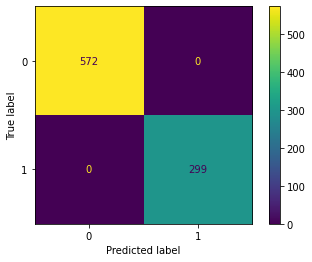

In [25]:
M1 = confusion(model, df)

<h2>F1 Score</h2>

In [26]:
from sklearn.metrics import f1_score

In [27]:
def get_f1(model, df):
    return f1_score(df['Label'].values, model.predict(df.iloc[:,:-1]))

In [31]:
F1 = get_f1(model, df)
F1

1.0

In [29]:
n = np.argmax([get_f1(estimator, df) for estimator in model.estimators_])

In [30]:
get_f1(model.estimators_[n], df)

0.9933333333333334

<h2>Best Features</h2>

In [18]:
from sklearn.inspection import permutation_importance

In [38]:
result = permutation_importance(model.estimators_[n], df.iloc[:,:-1], df['Label'], n_repeats=10,
                                random_state=0)
perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(model.feature_importances_)

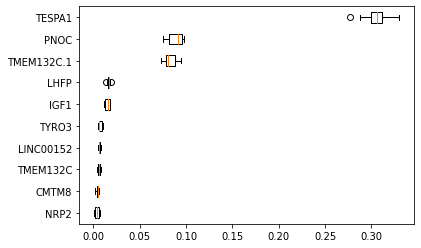

In [39]:
plt.boxplot(result.importances[perm_sorted_idx][-10:].T, vert=False, labels=df.iloc[:,:-1].columns[perm_sorted_idx][-10:]);

<h2>Runtime Tests</h2>

In [34]:
runtime1 = df.iloc[[3]]
runtime1

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
3,166.01084,26.159284,61.373704,0.0,30.183789,254.549955,446.720079,0.0,0.0,25.153158,...,0.0,0.0,0.0,0.0,0.0,0.0,1.006126,0.0,0.0,1


In [35]:
model.predict(runtime1.iloc[:,:-1])

array([1])

In [36]:
runtime2 = df.iloc[[343]]
runtime2

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
343,0.0,45.962403,0.999183,4165.592545,0.0,0.0,0.999183,1174.039636,58.951777,0.0,...,0.0,0.0,344.718021,0.0,259.787494,0.999183,0.0,12.989375,0.0,0


In [37]:
model.predict(runtime2.iloc[:,:-1])

array([0])